# Introduction to Statistics (week 3)

## Example 1: Wheel of Fortune

Suppose you spin a wheel of fortune many times. Each time, one of the numbers m_1, m_2, ..., m_n comes up with a probability p_1, p_2, ..., p_n, and this is how much money you would get from each spin. What amount of money do you expect to get per spin?

To help answer this question, code a function where you spin the wheel k times and compute the average amount received per spin.


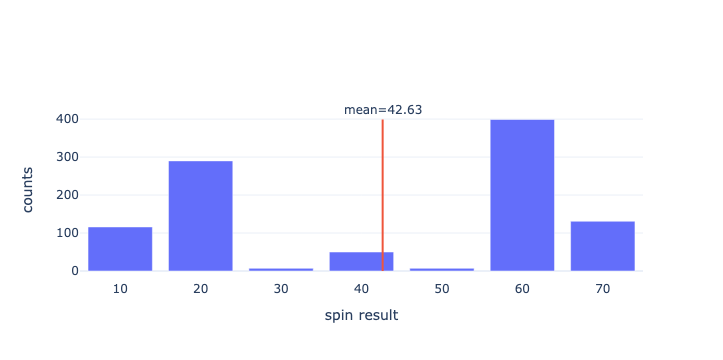

42.63

In [4]:
import numpy as np
from util import plot_many_spins

def spin_wheel(k: int):
    wheel = {10: 0.1, 20: 0.3, 30: 0.01, 40: 0.05, 50: 0.01, 60: 0.4, 70: 0.13}

    # TODO: code here
    
    return np.random.choice(list(wheel.keys()), size=k, p=list(wheel.values()))

    # end TODO


def compute_mean(vals):

    avg_result = None

    # TODO: code here
    
    avg_result = sum(vals) / vals.shape[0]

    # end TODO

    return avg_result

spin_results = spin_wheel(1000)
plot_many_spins(spin_results)
compute_mean(spin_results)

For the given wheel of fortune, write a function that will compute the mean value and how much variability there is around it. The spread (variance) can be computed as follows:

- compute the mean
- for each value, compute how far off it is from the mean in either direction: use the squared difference for that
- compute the average of all the obtained differences

In [5]:
def mean_and_variance(k: int):

    # TODO: code here 

    spin_results = spin_wheel(k)

    mean = compute_mean(spin_results)
    variance = sum([(val - mean) ** 2 for val in spin_results]) / (k - 1)

    return mean, variance

    # end TODO

mean_and_variance(k=1000)


(43.6, 479.11911911912756)

## Example 2: Iris dataset



<div style="display: flex; gap:10px;">
  <img src="https://images.unsplash.com/photo-1684154740753-00e1f0b3a7f1?q=80&w=2970&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="height:150px; float: left; margin-right: 10px" />
  <p>
    In 1936, a botanist Edgar Anderson measured the petal and sepal width and length of different species of the iris flower. He published the data - which unlikely became one of the most used datasets in statistics (and machine learning). This dataset includes the measurements of sepal width and length and petal width and length for three species of iris. </br></br>
  For this example, compute the mean and variance of sepal lengths using the procedure above.</p>
</div>



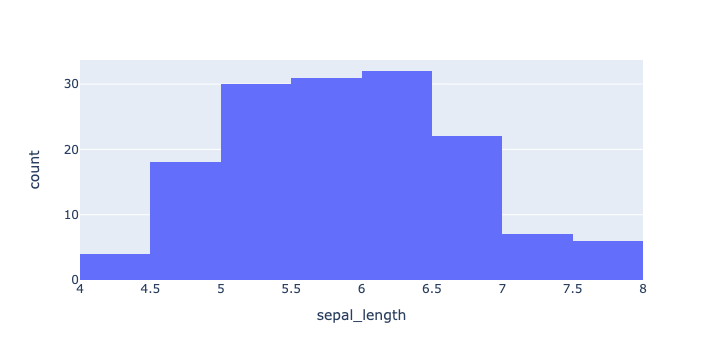

(5.843333333333335, 0.6811222222222222)

In [12]:
from util import get_iris_dataset
import plotly.express as px

dataset = get_iris_dataset()

fig = px.histogram(dataset, x='sepal_length')
fig.show()

def mean_and_variance(values):
    
    # TODO: code here

    mean = sum(values) / values.shape[0]
    variance = sum((el - mean)**2 for el in values) / values.shape[0]

    return mean, variance

    # end TODO

mean_and_variance(dataset['sepal_length'])

Write functions that will, given the observations, answer the following questions:
- what is the most frequent sepal length in this dataset?
- if we sort all the values, what value is in the middle?

In [3]:
# What is the most frequent sepal length in this dataset?

def most_frequent_value(lengths):

    # TODO: code here
    
    counts = {}
    for l in lengths:
        if l in counts:
            counts[l] += 1
        else:
            counts[l] = 1
    
    max_l, max_count = None, -1
    for l, count in counts.items():
        if count > max_count:
            max_count = count
            max_l = l

    return max_l

    # end TODO

most_frequent_value(dataset['sepal_length'])

5.0

In [4]:
# If we sort all the values, which is the value in the middle?

def median(lengths):

    # TODO: code here
    
    if lengths.shape[0] % 2 == 0:
        return sorted(lengths)[lengths.shape[0] // 2]
    else:
        return sum(sorted(lengths)[lengths.shape[0] - 1:lengths.shape[0] + 1]) / 2

    # end TODO

print(sorted(dataset['sepal_length'].values))
median(dataset['sepal_length'])

[4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 7.0, 7.1, 7.2, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9]


5.8

### What if we want to inspect two (random) variables?

In this example, we want to examine the relationship between petal width and length in the dataset. 

Write a function that will compute a quantitative measure of this relationship:
- compute the mean for both variables
- for each observation, find a product of differences between the observation and the mean for the given variable
- sum all the differences and divide them by the number of observations.

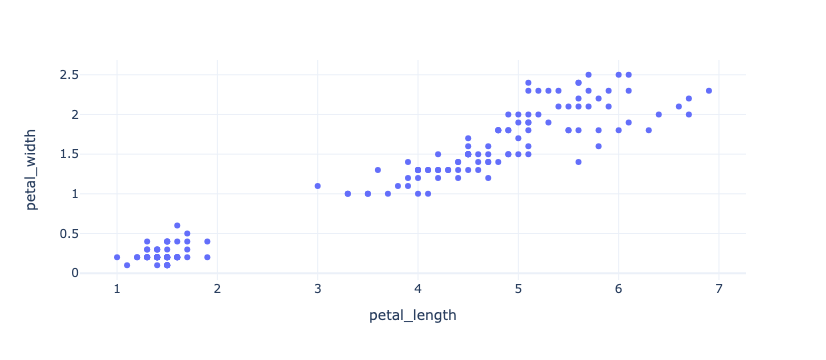

1.2877448888888892

In [19]:
fig = px.scatter(dataset, x='petal_length', y='petal_width')
fig.update_layout(template='plotly_white')
fig.show()

def covariance(var1, var2):

    assert var1.shape[0] == var2.shape[0]
    observation_count = var1.shape[0]
    
    cov = None
    
    # TODO: code here

    var1_mean = compute_mean(var1)
    var2_mean = compute_mean(var2)

    cov = [(var1[i] - var1_mean) * (var2[i] - var2_mean) for i in range(observation_count)]
    cov = sum(cov) / observation_count
    
    # end TODO

    return cov

covariance(dataset['petal_length'], dataset['petal_width'])

Write a function that computes the same quantity as before, except that it normalizes it so that it ranges between -1 and 1.

In [20]:
def correlation(var1, var2):
    assert var1.shape[0] == var2.shape[0]
    observation_count = var1.shape[0]
    
    corr = None
    
    # TODO: code here

    var1_mean, var1_variance = mean_and_variance(var1)
    var2_mean, var2_variance = mean_and_variance(var2)

    corr = covariance(var1, var2) / np.sqrt(var1_variance * var2_variance)
    
    # end TODO

    return corr

correlation(dataset['petal_length'], dataset['petal_width'])

0.9627570970509667

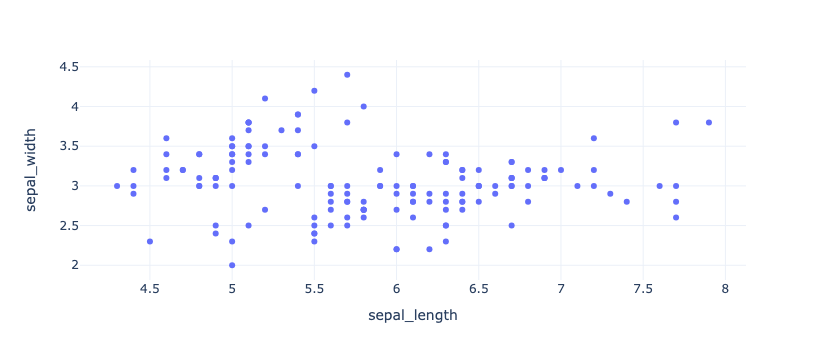

-0.10936924995064935

In [21]:
fig = px.scatter(dataset, x='sepal_length', y='sepal_width')
fig.update_layout(template='plotly_white')
fig.show()

correlation(dataset['sepal_length'], dataset['sepal_width'])

## Example 3

TODO: Add an example here where there is a clear dependence between two variables but correlation is 0

In [22]:
mean_and_variance(dataset['petal_length'])

(3.7586666666666693, 3.0924248888888854)